In [1]:
from astropy import units as u
from astropy import time

import numpy as np

from poliastro import iod
from poliastro.bodies import Mars, Earth, Venus, Jupiter,Saturn, Uranus, Neptune, Sun
from poliastro.ephem import Ephem
from poliastro.maneuver import Maneuver
from poliastro.twobody import Orbit
from poliastro.util import time_range
from poliastro.plotting import OrbitPlotter3D, StaticOrbitPlotter
import math
import matplotlib.pyplot as plt
# More info: https://plotly.com/python/renderers/
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

from astropy.coordinates import solar_system_ephemeris


solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

In [2]:
#starship specs
isp = 380
dry_mass = 90
prop_mass = 1500 #tons
lmo_fuel = 250


# landing_reserve = 500

starship_dv = isp*9.81*math.log((dry_mass+prop_mass)/dry_mass)
# boiloff = 0#0 
print(starship_dv)

# #for a skimpy 100t starship, only need 20 tons of landing fuel
# print(isp*9.81*math.log((120)/(100)))



10705.047305642622


6557 x 23725 km x 0.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)


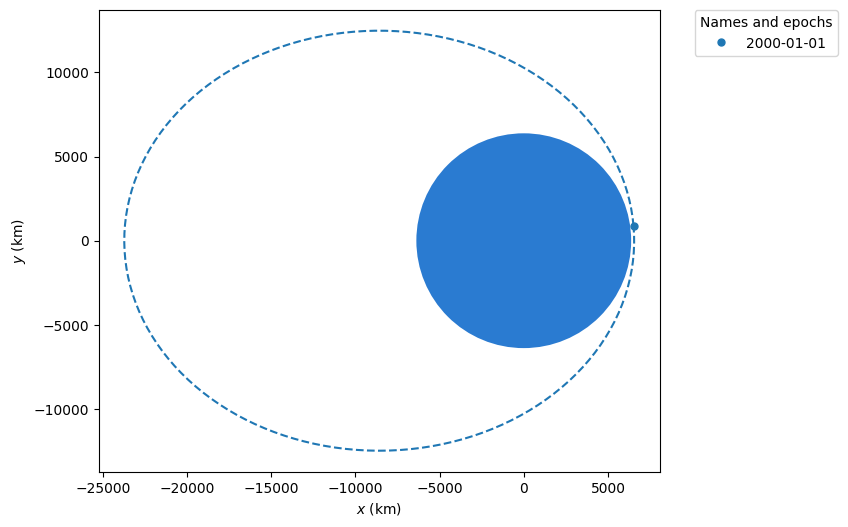

In [3]:
orb=Orbit.circular(Earth, alt=200*u.km)
prograde_vector = (orb.v/(np.linalg.norm(orb.v))).value
prograde_burn = Maneuver((200*u.s,2*prograde_vector*u.km/u.s))
post_burn_orb=orb.apply_maneuver(prograde_burn)
post_burn_orb.plot()
print(post_burn_orb)